<a href="https://colab.research.google.com/github/JChengecha/Future-Contraceptive-Use/blob/main/Intelligent_Forecasting_Challenge_Model_Future_Contraceptive__Use_in_Cote_d'Ivoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTELLIGENT FORECASTING CHALLENGE**

## **DEFINING THE QUESTION**

### **SPECIFYING THE QUESTION**



> We  are required to build a model that will effectively predict the use of contraceptives in Côte d'Ivoire.





### **DEFINING THE METRIC OF SUCCESS**


> Our challenge is a regression problem. Therefore, our project will be considered a success if we're able to develop a model with the lowest error metric.



### **UNDERSTANDING THE CONTEXT**

> Contraceptive access is vital to safe motherhood, healthy families, and prosperous communities. Greater access to contraceptives enables couples and individuals to determine whether, when, and how often to have children. In low- and middle-income countries (LMIC) like Côte d'Ivoire, health systems are often unable to accurately predict the quantity of contraceptives necessary for each health service delivery site, in part due to insufficient data, limited staff capacity, and inadequate systems.

>When too few supplies are ordered, service delivery sites may run out, limiting access to contraceptives and family planning. When too much product is ordered, unused contraceptives are wasted if they are left to expire.

>Accurate forecasting of contraceptive consumption can save lives, money, and time by ensuring health service delivery sites have what they need when they need it and by reducing waste in the supply chain.

### **RECORDING THE EXPERIMENTAL DESIGN**

* Import the relevant libraries that we will use in our analysis.
* Read and explore the dataset we will use for our project.
* Define the appropriateness of the available data with regards to the project
* Find and deal with outliers and missing data within the dataset.
* Perform univariate and bivariate analysis while recording our observations.
* Implement the solution by using the various regression algorithms to predict the future consumption of contraceptives based on given information.
* Challenge the solution by giving insights on how we can optimize the models to give us a better performance as compared to the baseline model.
* Provide recommendations based on the whole analysis and modelling techniques used in the project.

### **DATA RELEVANCE**

> This was evaluated against the metric of success after solution implementation. Our main dataset is the **Train Dataset**.

> The train dataset has the following columns:
1. **year:**	The year of the observation											
2. **month:**	The month of the observation											
3. **region:**	The higher level geographical area within Côte d'Ivoire
4. **district:**	The lower level geographical area within Côte d'Ivoire
5. **site_code:**	The actual health service delivery site					
6. **product_code:**	The unique identifier for each commodity.
7. **stock_initial:**	Stock in hand of previous period. This is quantified in dispensing units. 											
8. **stock_received:**	Total quantity received in last period. This is quantified in dispensing units. 											
9. **stock_distributed*:**	Quantity dispensed/consumed in last reporting period. This is quantified in dispensing units. Note: This is the target variable. 											
10. **stock_adjustment:**	All kinds of losses/ adjustments made at the facility											
11. **stock_end:**	Current physical count of stock on hand. This is quantified in dispensing units.											
12. **average_monthly_consumption:**	"Average monthly consumption, for last three months. This is quantified in dispensing units. 
Note: Average monthly consumption in the system actually provides an average of the most recently available Normalized Consumption values. Normalized Consumption is the stock_distributed value adjusted to reflect any stock_stockout_days. Because months are approximated to have 30 days, one which had 15 stockout days would yield a Normalized Consumption of exactly twice its Monthly Consumption."											
13. **stock_stockout_days:**	Total number of days facility was out of stock.											
14. **stock_ordered:**	The requested quantity. This is quantified in dispensing units.											
											


## **EXTERNAL DATASOURCE VALIDATION**

## **READING THE DATA**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pmdarima
!pip install catboost

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.5 MB 5.4 MB/s 
     |████████████████████████████████| 9.5 MB 13.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 67.4 MB 27 kB/s 


In [2]:
# READING OUR ANNUAL DATASET
annual = pd.read_csv('contraceptive_case_data_annual.csv')

# Reading our monthly
monthly = pd.read_csv('monthly_cases.csv')

# Reading service delivery site data
site = pd.read_csv('service_delivery_site_data.csv')

# Reading our Train dataset
df = pd.read_csv('Train.csv')

# Reading the product dataset
prod = pd.read_csv('product.csv')

## **PREVIEWING THE DATA**

In [3]:
# Previewing our Annual dataset
annual.head(5)

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [4]:
# Previewing the monthly dataset
monthly.head(5)

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,NaN,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,NaN,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [5]:
# Previewing the site dataset
site.head(5)

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [6]:
# Previewing our Train dataset
df.head(5)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [7]:
# Check the records we have in our annual dataset
print('annual dataset\n',annual.shape,'\n')
print('monthly dataset\n',monthly.shape,'\n')
print('Train dataset\n',df.shape,'\n')


annual dataset
 (339, 27) 

monthly dataset
 (678, 28) 

Train dataset
 (35753, 14) 



> * The annual dataset has 339 records and 27 attributes.
* The monthly dataset has 678 records and 28 attributes. 
* The train dataset has 35753 records and 14 attributes. 

In [8]:
# Checking the info on our annual dataset 
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     339 non-null    object 
 1   year                         339 non-null    int64  
 2   implant_women_old            326 non-null    float64
 3   implant_women_new            337 non-null    float64
 4   injection2_women_old         337 non-null    float64
 5   injection2_women_new         334 non-null    float64
 6   injection3_women_old         339 non-null    int64  
 7   injection3_women_new         339 non-null    int64  
 8   pill_women_old               339 non-null    float64
 9   pill_women_new               338 non-null    float64
 10  iud_women_old                212 non-null    float64
 11  iud_women_new                277 non-null    float64
 12  iud_number_dispensed         233 non-null    float64
 13  implant_number_dispe

In [9]:
# checking the info on our monthly dataset 
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     678 non-null    object 
 1   month                        678 non-null    int64  
 2   year                         678 non-null    int64  
 3   implant_women_old            610 non-null    float64
 4   implant_women_new            672 non-null    float64
 5   injection2_women_old         556 non-null    float64
 6   injection2_women_new         481 non-null    float64
 7   injection3_women_old         678 non-null    int64  
 8   injection3_women_new         678 non-null    int64  
 9   pill_women_old               621 non-null    float64
 10  pill_women_new               595 non-null    float64
 11  iud_women_old                250 non-null    float64
 12  iud_women_new                306 non-null    float64
 13  iud_number_dispensed

In [10]:
# checking the info on our train dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

In [11]:
# Summary of the numerical attributes
annual.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,339.0,2017.000000,0.817704,2016.0,2016.00,2017.0,2018.00,2018.0
implant_women_old,326.0,1499.193252,2975.216904,1.0,90.75,459.0,1430.00,23226.0
implant_women_new,337.0,572.875371,633.746985,5.0,146.00,350.0,749.00,3959.0
injection2_women_old,337.0,1097.528190,1641.024406,2.0,132.00,498.0,1295.00,10349.0
injection2_women_new,334.0,243.158683,398.174681,1.0,60.00,145.0,293.75,4535.0
injection3_women_old,339.0,5657.554572,25958.064589,144.0,1612.50,2828.0,5433.00,475882.0
injection3_women_new,339.0,1065.843658,809.122417,65.0,460.00,879.0,1456.00,5164.0
pill_women_old,339.0,1206.662832,1774.006091,1.0,154.00,490.0,1502.00,12508.0
pill_women_new,338.0,269.105621,615.979742,1.0,60.50,141.0,311.25,8376.0
iud_women_old,212.0,138.396226,367.104029,1.0,12.00,37.5,130.00,3482.0


In [12]:
# Summary of the numerical attributes
monthly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,678.0,3.500000,1.709086,1.0,2.00,3.5,5.00,6.0
year,678.0,2019.000000,0.000000,2019.0,2019.00,2019.0,2019.00,2019.0
implant_women_old,610.0,213.509836,358.961649,1.0,12.00,75.0,288.50,2883.0
implant_women_new,672.0,77.831845,108.731927,1.0,21.00,45.0,87.00,1344.0
injection2_women_old,556.0,39.429856,71.846085,1.0,6.00,18.0,50.00,1259.0
injection2_women_new,481.0,9.428274,12.449881,1.0,2.00,5.0,12.00,133.0
injection3_women_old,678.0,495.436578,467.385785,20.0,184.50,320.0,665.75,2534.0
injection3_women_new,678.0,110.523599,94.042050,7.0,51.00,87.0,136.75,1061.0
pill_women_old,621.0,98.466989,126.187320,1.0,15.00,45.0,130.00,726.0
pill_women_new,595.0,17.986555,26.655676,1.0,5.00,10.0,21.00,314.0


In [13]:
# Summary of the numerical attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,35753.0,2017.433782,1.019933,2016.0,2017.0,2017.0,2018.0,2019.0
month,35753.0,6.169412,3.429079,1.0,3.0,6.0,9.0,12.0
stock_initial,35753.0,63.245518,168.661538,0.0,0.0,12.0,69.0,4320.0
stock_received,35753.0,14.846055,70.631782,0.0,0.0,0.0,0.0,3534.0
stock_distributed,35753.0,14.764327,39.848242,0.0,0.0,1.0,13.0,1728.0
stock_adjustment,35753.0,0.961150,37.883099,-1440.0,0.0,0.0,0.0,3003.0
stock_end,35753.0,64.288395,170.848479,0.0,0.0,13.0,70.0,4320.0
average_monthly_consumption,35753.0,14.606439,32.521384,0.0,0.0,3.0,16.0,864.0
stock_stockout_days,35753.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
stock_ordered,34990.0,26.658102,107.166082,0.0,0.0,0.0,20.0,10240.0


#### **MERGING THE TRAIN DATASET** 

In [14]:
# Merging the train dataset with the relevant columns

# adopting the site type column to the train dataset
df=pd.merge(site[['site_code','site_type']],df,how='inner',left_on=['site_code'],right_on=['site_code'])

# adopting the product type column to the train dataset
df = pd.merge(prod[['product_code','product_type']],df,how='inner',left_on=['product_code'],right_on=['product_code'])

# dropping the product code column
df.drop(columns=['product_code'], axis = 1, inplace=True)

df.head(5)

,product_type,site_code,site_type,year,month,region,district,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,Female Condom,C4001,Hospital,2016,1,INDENIE-DJUABLIN,ABENGOUROU,0,0,0,0,0,0,0,0.0
1,Female Condom,C2002,Hospital,2017,1,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0
2,Female Condom,C2002,Hospital,2017,2,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0
3,Female Condom,C2002,Hospital,2017,3,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0
4,Female Condom,C2002,Hospital,2017,4,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0


> We decided to replace the initial product code with the product type column so as to help us get better insights from our analysis. 

## **DATA CLEANING**

### **REMOVING DUPLICATES**


In [15]:
# Check for the consistency in our data
print('annual\n',annual.duplicated().sum())
print('monthly\n',monthly.duplicated().sum())
print('train\n',df.duplicated().sum())


annual
 0
monthly
 0
train
 0


> There were no duplicated values in any of our datasets. 

### **DEALING WITH MISSING VALUES**

##### **ANNUAL DATASET**

In [16]:
#Calaculating the percentage of missing values and then visualising it 
# Count the missing values
missing_count = annual.isnull().sum() 
#the count of all values
value_count = annual.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
district                         0        0.00
year                             0        0.00
implant_women_old               13        3.83
implant_women_new                2        0.59
injection2_women_old             2        0.59
injection2_women_new             5        1.47
injection3_women_old             0        0.00
injection3_women_new             0        0.00
pill_women_old                   0        0.00
pill_women_new                   1        0.29
iud_women_old                  127       37.46
iud_women_new                   62       18.29
iud_number_dispensed           106       31.27
implant_number_dispensed         6        1.77
injection2_number_dispensed      8        2.36
injection3_number_dispensed      1        0.29
pill_number_dispensed            5        1.47
iud_number_received             94       27.73
implant_number_received          6        1.77
injection2_number_received      11        3.24
injection3_nu

In [17]:
#Dropping the iud_stock_end and injection2_stock_end
annual.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

> Considering the fact that these two columns had 100% missing values, we decided to drop them since they represent missing records which could have occurred during the data collection process. 

In [18]:
# filling the null values with zero
annual.fillna(0, inplace=True)
annual.isnull().sum()

district                       0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

> We dropped the columns that had no entries recorded (100% missing values) and proceeded to fill the rest of the columns with zeros.

##### **MONTHLY DATASET**

In [19]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = monthly.isnull().sum() 
#the count of all values
value_count = monthly.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
district                         0        0.00
month                            0        0.00
year                             0        0.00
implant_women_old               68       10.03
implant_women_new                6        0.88
injection2_women_old           122       17.99
injection2_women_new           197       29.06
injection3_women_old             0        0.00
injection3_women_new             0        0.00
pill_women_old                  57        8.41
pill_women_new                  83       12.24
iud_women_old                  428       63.13
iud_women_new                  372       54.87
iud_number_dispensed           429       63.27
implant_number_dispensed        29        4.28
injection2_number_dispensed    170       25.07
injection3_number_dispensed     16        2.36
pill_number_dispensed           63        9.29
iud_number_received            344       50.74
implant_number_received         35        5.16
injection2_nu

In [20]:
#Dropping the iud_stock_end and injection2_stock_end
monthly.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

In [21]:
# filling the null values with zero
monthly.fillna(0, inplace=True)
monthly.isnull().sum()

district                       0
month                          0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

> For the monthly dataset, we again dropped the columns that had no entries recorded (100% missing values) and proceeded to fill the rest of the columns with zeros.

##### **TRAIN DATASET**

In [22]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = df.isnull().sum() 
#the count of all values
value_count = df.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
product_type                     0        0.00
site_code                        0        0.00
site_type                        0        0.00
year                             0        0.00
month                            0        0.00
region                           0        0.00
district                         0        0.00
stock_initial                    0        0.00
stock_received                   0        0.00
stock_distributed                0        0.00
stock_adjustment                 0        0.00
stock_end                        0        0.00
average_monthly_consumption      0        0.00
stock_stockout_days              0        0.00
stock_ordered                  763        2.13


> We determined that the stock_ordered column had 2.13% missing values which we will deal with later.

### **TAKING CARE OF THE INVALID ZEROS IN OUR DATASET**


These invalid 0 values may be identified, for example, when:

A) Stock_distributed for a contraceptive product at a service delivery site is reported in a given month as '0', even though stock was available (stock_initial was above 0) and stock_distributed is historically well above 0.

B) All fields (possibly with the exception of stock_ordered) are recorded as '0' for a given contraceptive product, month and service delivery site; or

#### **FULFILLING THE FIRST CONDITION**

In [23]:
# Defining a function that takes the conditions listed above and fills invalid zeros with a ?
def invalid(stock_initial, stock_received , stock_adjustment, stock_end, average_monthly_consumption, stock_ordered, stock_distributed):
    if stock_initial > 0 and average_monthly_consumption > 0 and stock_distributed == 0:
      stock_distributed = '?' 
    else:
        stock_distributed=stock_distributed
    return stock_distributed
              

#Mapping our function onto a new column
df['NewColumn_1'] = df.apply(lambda x: invalid(x['stock_initial'], x['stock_received'], x['stock_adjustment'], x['stock_end'],
                                               x['average_monthly_consumption'], x['stock_ordered'], x["stock_distributed"]), axis=1)
df.replace('?', np.nan, inplace=True)
df.rename(columns={"NewColumn_1" : "stock_distributed2"}, inplace = True)

> Going by the first condition, we defined a function that returns '?' if the stock_distributed condition is met. This in turn helps us identify the rows that had invalid zeros in the stock_distributed column. 

In [24]:
#Cheking missing values on our columns
df.isnull().sum()

product_type                      0
site_code                         0
site_type                         0
year                              0
month                             0
region                            0
district                          0
stock_initial                     0
stock_received                    0
stock_distributed                 0
stock_adjustment                  0
stock_end                         0
average_monthly_consumption       0
stock_stockout_days               0
stock_ordered                   763
stock_distributed2             2858
dtype: int64

> Using the function, we determined that there were 2858 invalid zeroes in our stock_distributed column which we will deal with later. 

In [25]:
#Filling null values with the mode
df["stock_ordered"].fillna(df["stock_ordered"].mode()[0], inplace = True)

# Cheking if null values have been replaced with the mode
df.isnull().sum()

product_type                      0
site_code                         0
site_type                         0
year                              0
month                             0
region                            0
district                          0
stock_initial                     0
stock_received                    0
stock_distributed                 0
stock_adjustment                  0
stock_end                         0
average_monthly_consumption       0
stock_stockout_days               0
stock_ordered                     0
stock_distributed2             2858
dtype: int64

> Afterwards, we decided to fill the nulls in the stock_ordered column with the mode basing on the assumption that since the distribution of contraceptives to public health sites is centralized and thus the stock_ordered for most sites could be the same. 

####**CONVERTING TO DATETIME**

In [26]:
#convert to date time
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)

df['date'] = pd.to_datetime(df['date'],yearfirst=True)
df1 = df.copy()
df = df.set_index('date')
df.head()

,product_type,site_code,site_type,year,month,region,district,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,stock_distributed2
date,,,,,,,,,,,,,,,,
2016-01-01,Female Condom,C4001,Hospital,2016,1,INDENIE-DJUABLIN,ABENGOUROU,0,0,0,0,0,0,0,0.0,0.0
2017-01-01,Female Condom,C2002,Hospital,2017,1,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0
2017-02-01,Female Condom,C2002,Hospital,2017,2,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0
2017-03-01,Female Condom,C2002,Hospital,2017,3,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0
2017-04-01,Female Condom,C2002,Hospital,2017,4,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0,0.0,0.0


> We concatenated the year and month column to form a date column. Afterwards, we converted the date column to datetime format and set it as our index in the train dataset. 

In [27]:
df.sort_values(by='date',ascending=True, inplace = True)

# Lokking at the unique values
df["year"].unique()

array([2016, 2017, 2018, 2019])

> We then sorted the dates of the train dataset in ascending order so that we can use it during the time series analysis. 

In [28]:
#dropping null values in stock distributed2
df.dropna(inplace=True)

> We dropped all the null values in our stock_distributed2 column because they were invalid. 

In [29]:
#checking the null values
df.isnull().sum()

product_type                   0
site_code                      0
site_type                      0
year                           0
month                          0
region                         0
district                       0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
stock_distributed2             0
dtype: int64

In [30]:
#Dropping the stock distributed column
df.drop(columns = ["stock_distributed", "stock_stockout_days"], inplace = True)

> Ultimately we dropped the stock_distributed column along with the stock_stockout_days which was plainly zero so as to ensure high quality in our dataset.

#### **FULFILLING THE SECOND CONDITION**




In [31]:
# Defining a function that takes the conditions listed above and fills invalid zeros with a ?
def invalid(stock_initial, stock_received , stock_adjustment, stock_end, average_monthly_consumption, stock_ordered, stock_distributed2): 
    if stock_initial == 0 and stock_received == 0 and stock_adjustment == 0 and stock_end == 0 and average_monthly_consumption == 0 and stock_ordered == 0:
      stock_distributed2 = '?'
      stock_initial = '?'
      stock_received = '?'
      stock_adjustment = '?'
      stock_end = '?'
      average_monthly_consumption = '?'
      stock_ordered = '?'
    else:
        stock_distributed2=stock_distributed2
        stock_initial=stock_initial
        stock_received=stock_received
        stock_adjustment=stock_adjustment
        stock_end=stock_end
        stock_ordered=stock_ordered
        average_monthly_consumption=average_monthly_consumption
    #Pandas Series.mean() function return the mean of the underlying data in the given Series object.
    return pd.Series([
                      stock_distributed2,
                      stock_initial,
                      stock_received,
                      stock_adjustment,
                      stock_end,
                      stock_ordered,
                      average_monthly_consumption
    ])

#Mapping our function onto a new column
df[['NewColumn_1', 'NewColumn_2', 'NewColumn_3', 'NewColumn_4', 'NewColumn_5','NewColumn_6', 'NewColumn_7' ]] = df.apply(lambda x: invalid(x['stock_initial'], x['stock_received'], x['stock_adjustment'], x['stock_end'],
                                               x['average_monthly_consumption'], x['stock_ordered'], x["stock_distributed2"]), axis=1)
df.replace('?', np.nan, inplace=True)
df.rename(columns={"NewColumn_1" : "stock_distributed3"}, inplace = True)
df.rename(columns={"NewColumn_2" : "stock_initial2"}, inplace = True)
df.rename(columns={"NewColumn_3" : "stock_received2"}, inplace = True)
df.rename(columns={"NewColumn_4" : "stock_adjustment2"}, inplace = True)
df.rename(columns={"NewColumn_5" : "stock_end2"}, inplace = True)
df.rename(columns={"NewColumn_6" : "stock_ordered2"}, inplace = True)
df.rename(columns={"NewColumn_7" : "average_monthly_consumption2"}, inplace = True)

> We defined a function that will help us identify all the invalid zeros specified in our second condition. 

In [32]:
#Cheking if the null values have been chosen  
df.isnull().sum()

product_type                       0
site_code                          0
site_type                          0
year                               0
month                              0
region                             0
district                           0
stock_initial                      0
stock_received                     0
stock_adjustment                   0
stock_end                          0
average_monthly_consumption        0
stock_ordered                      0
stock_distributed2                 0
stock_distributed3              4883
stock_initial2                  4883
stock_received2                 4883
stock_adjustment2               4883
stock_end2                      4883
stock_ordered2                  4883
average_monthly_consumption2    4883
dtype: int64

> We were able to determine that there were 4883 invalid zeros in some of our columns which we decided to drop since filling/replacing would create inaccuracies in our analysis. Afterwards, we dropped the initial columns that will not be help in our analysis. 

In [33]:
# Dropping the null values in the column
df.dropna(axis = 0, inplace = True)

In [34]:
# Dropping the unecessary column 
df.drop(columns = ["stock_initial", 'stock_received', 'stock_distributed2',
       'stock_adjustment', 'stock_end', 'average_monthly_consumption',
       'stock_ordered'], inplace = True)

In [35]:
#Cheking to see whether the null values have been dropped
df.isnull().sum()

product_type                    0
site_code                       0
site_type                       0
year                            0
month                           0
region                          0
district                        0
stock_distributed3              0
stock_initial2                  0
stock_received2                 0
stock_adjustment2               0
stock_end2                      0
stock_ordered2                  0
average_monthly_consumption2    0
dtype: int64

In [36]:
df.rename(columns={"stock_distributed3" : "stock_distributed2"}, inplace = True)
df.rename(columns={"stock_initial2" : "stock_initial"}, inplace = True)
df.rename(columns={"stock_received2" : "stock_received"}, inplace = True)
df.rename(columns={"stock_adjustment2" : "stock_adjustment"}, inplace = True)
df.rename(columns={"stock_end2" : "stock_end"}, inplace = True)
df.rename(columns={"stock_ordered2" : "stock_ordered"}, inplace = True)
df.rename(columns={"average_monthly_consumption2" : "average_monthly_consumption"}, inplace = True)

### **CHECKING FOR OUTLIERS**

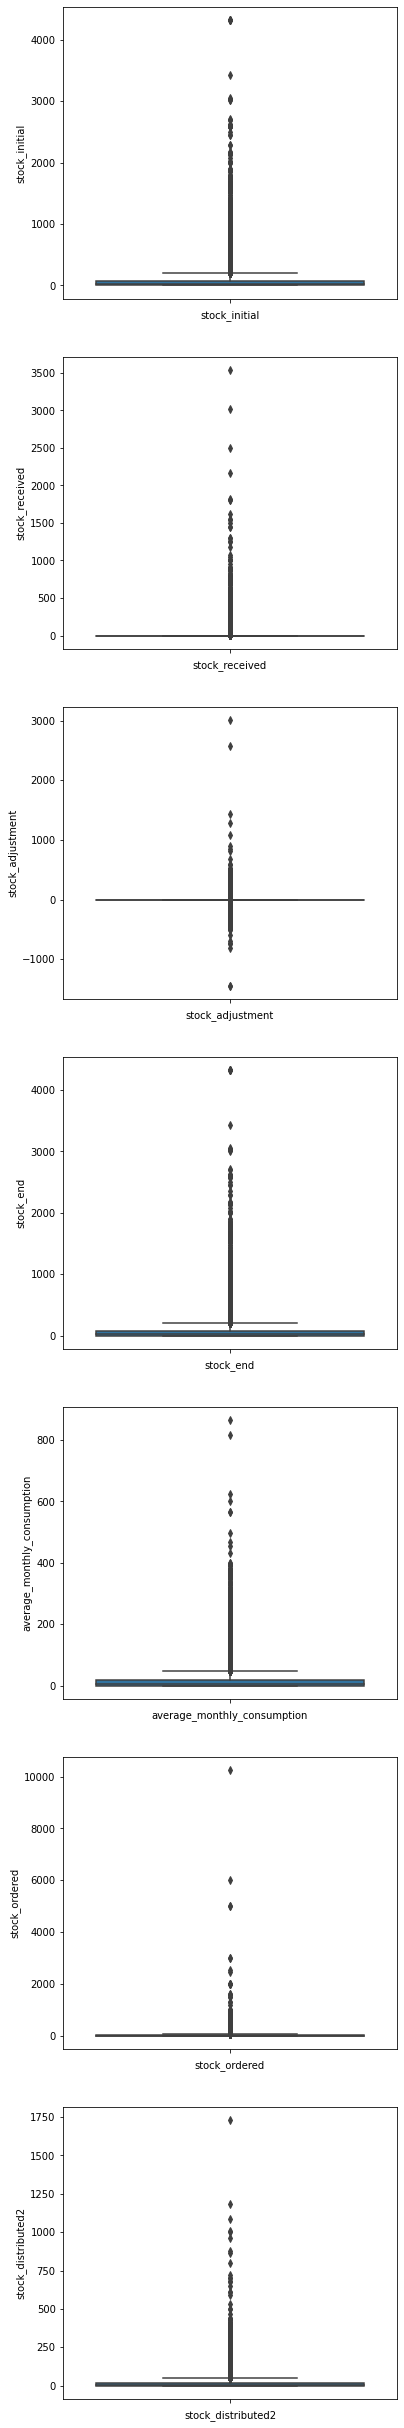

In [37]:
# Checking for outliers for numeric variables
import seaborn as sns
cols = ['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.boxplot(y=df[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

> Considering the high number of outliers in all our datasets, we opted against dropping because we may lose valuable information and thus we will consider log transformation instead for this case of our dataset

In [38]:
#Exporting to csv
annual.to_csv("Contraceptive_case_data_annual_cleaned.csv")

df.to_csv("train_cleaned.csv")

monthly.to_csv("monthly_cleaned.csv")

> We exported all the cleaned datasets into new files so as to enable manipulation and analysis using Tableau. 

## **EXPLORATORY DATA ANALYSIS**

### **DISTRIBUTION PLOTS**

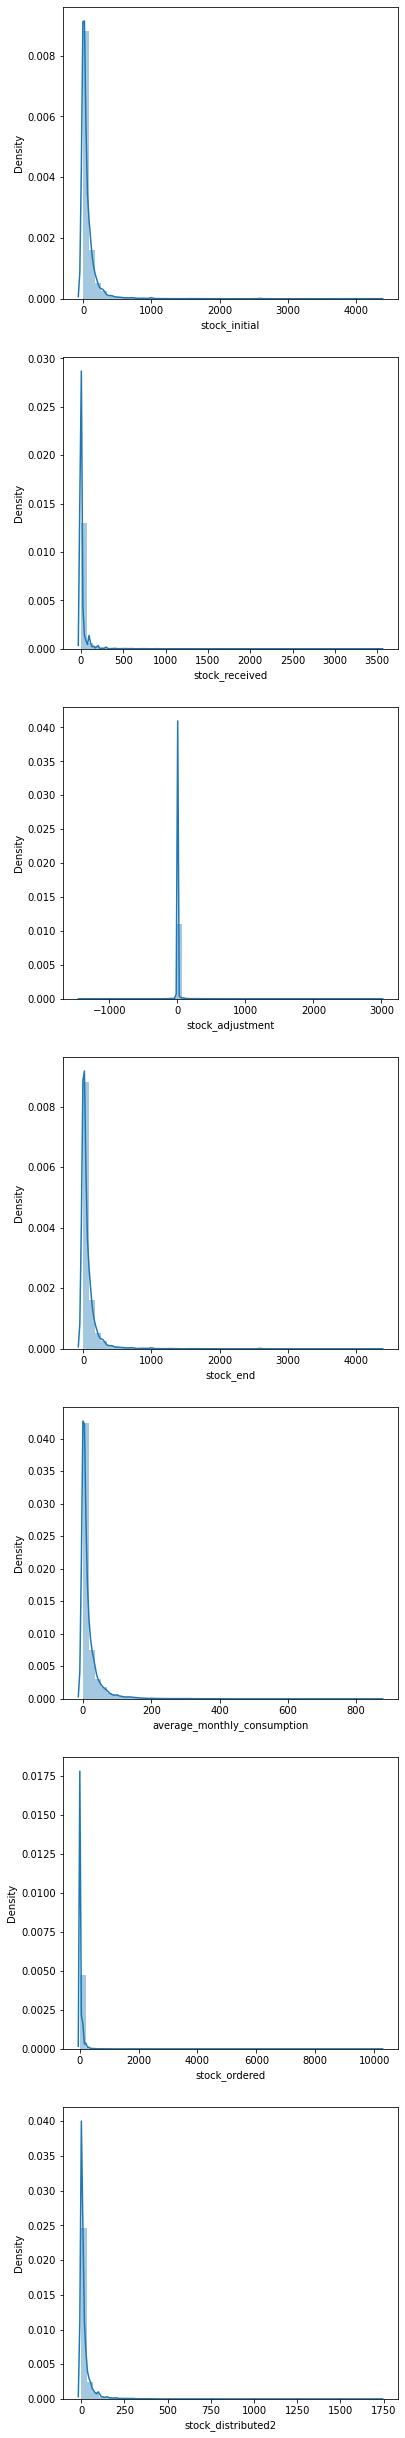

In [39]:
# Train Dataset
import seaborn as sns
cols = ['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(df[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

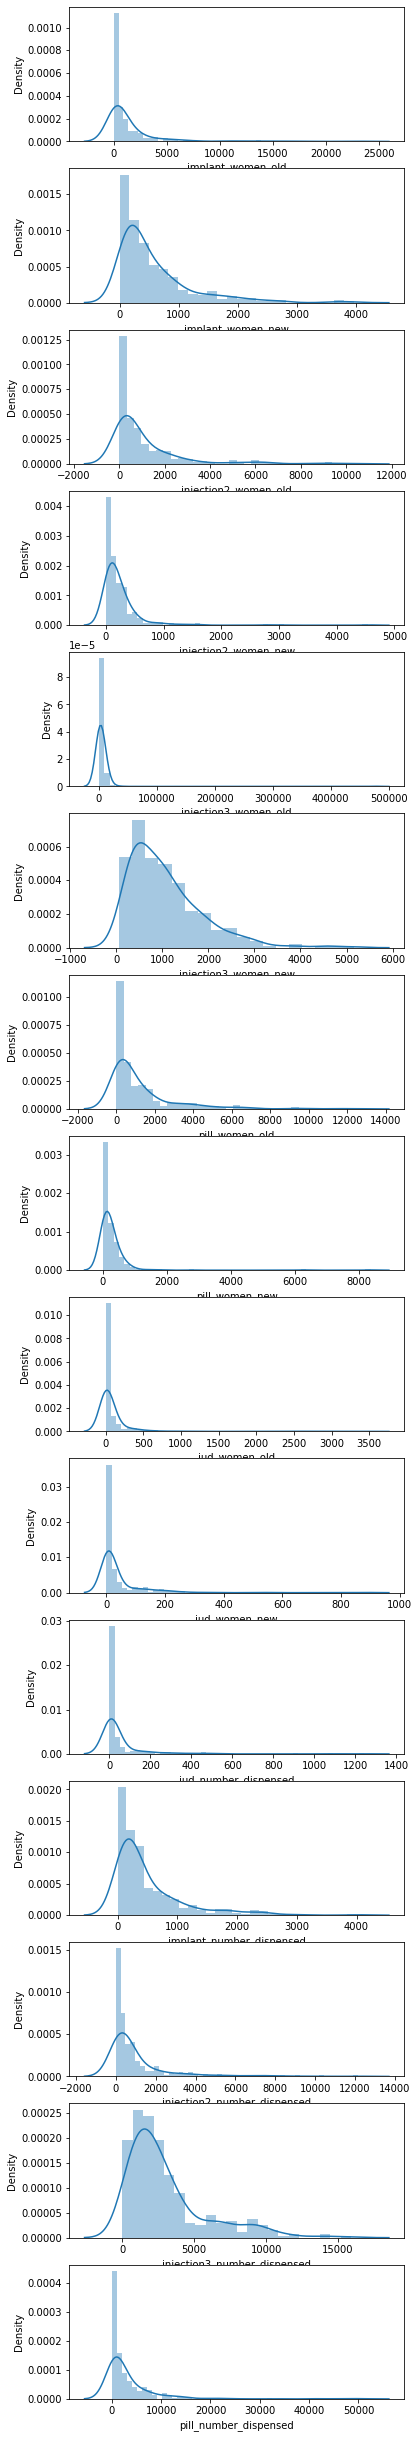

In [40]:
# Annual Dataset
import seaborn as sns
cols = ['implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(annual[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

### **UNIVARIATE DATA ANALYSIS**

#### **MEASURES OF CENTRAL TENDENCY**

In [41]:
# Finding the mean of our numerical variables
# Train

num = df[['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']]

num.mean()

stock_initial                  72.021776
stock_received                 18.149793
stock_adjustment                1.398936
stock_end                      72.726117
average_monthly_consumption    17.412359
stock_ordered                  32.600635
stock_distributed2             18.844388
dtype: float64

> The average stock distributed from 2016 to June 2019 in the train dataset is 18.84. 

In [42]:
# Finding the mode of our numerical variables

num.mode()

,stock_initial,stock_received,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,stock_distributed2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Finding the median 

num.median()

stock_initial                  20.0
stock_received                  0.0
stock_adjustment                0.0
stock_end                      20.0
average_monthly_consumption     6.0
stock_ordered                   0.0
stock_distributed2              4.0
dtype: float64

#### **MEASURES OF DISPERSION**

In [44]:
# Calculating the variance

num.var()

stock_initial                  32171.362205
stock_received                  6127.055995
stock_adjustment                1710.673124
stock_end                      32717.792181
average_monthly_consumption     1244.961831
stock_ordered                  14080.967095
stock_distributed2              1949.813741
dtype: float64

In [45]:
# Calculating the standard deviation

num.std()

stock_initial                  179.363771
stock_received                  78.275513
stock_adjustment                41.360284
stock_end                      180.880602
average_monthly_consumption     35.284017
stock_ordered                  118.663251
stock_distributed2              44.156695
dtype: float64

In [46]:
#skewness
def my_skew():
  for column in df:
    columncontent = df[column]
    if column in num:
      skew = columncontent.skew()
      if skew > 0:
        print('Positvely skewed')
      elif skew == 0:
        print('Symmetric skew')
      else:
        print('negatively skewed')

      print('column name', column)
      print('Column skew:', skew)
      print('\n') 
#calling
print(my_skew())


Positvely skewed
column name stock_distributed2
Column skew: 8.989274729223592


Positvely skewed
column name stock_initial
Column skew: 9.083867783347344


Positvely skewed
column name stock_received
Column skew: 14.335276135845488


Positvely skewed
column name stock_adjustment
Column skew: 23.378651789071156


Positvely skewed
column name stock_end
Column skew: 9.090969014360054


Positvely skewed
column name stock_ordered
Column skew: 36.61601992523829


Positvely skewed
column name average_monthly_consumption
Column skew: 5.763137921972461


None


In [47]:
#kurtosis
def kurt():
  for column in df:
    columncontent = df[column]
    if column in num:
      kurt = columncontent.kurt()
      if kurt > 0:
        print('Leptokurtic kurtosis')
      elif kurt < 0:
        print('platykurtic distribution')
      else:
        print('mesokurtic distribution')

      print('column name', column)
      print('Column kurt:', kurt)
      print('\n') 
#calling
print(kurt())

Leptokurtic kurtosis
column name stock_distributed2
Column kurt: 177.6255019401869


Leptokurtic kurtosis
column name stock_initial
Column kurt: 129.77316335211881


Leptokurtic kurtosis
column name stock_received
Column kurt: 377.5576297330849


Leptokurtic kurtosis
column name stock_adjustment
Column kurt: 1795.274180287315


Leptokurtic kurtosis
column name stock_end
Column kurt: 128.66115643967035


Leptokurtic kurtosis
column name stock_ordered
Column kurt: 2465.570914576265


Leptokurtic kurtosis
column name average_monthly_consumption
Column kurt: 59.08222005927266


None


#### **CHECKING THE NUMBER OF UNIQUE VALUES**

In [48]:
# Finding the unique values in our district column

df['district'].nunique()

80

> There are 80 districts in our train dataset which is consistent with the World Bank Data on Cote d'Ivoire. 

In [49]:
# Finding the unique values in our regions column

df['region'].nunique()

20

> There are 20 regions in our train dataset which is consistent with the World Bank Data on Cote d'Ivoire. 

In [50]:
df.columns

Index(['product_type', 'site_code', 'site_type', 'year', 'month', 'region',
       'district', 'stock_distributed2', 'stock_initial', 'stock_received',
       'stock_adjustment', 'stock_end', 'stock_ordered',
       'average_monthly_consumption'],
      dtype='object')

In [51]:
df['product_type'].unique()

array(['Depo provera', 'Microgynon (pill)', 'Jadelle implant',
       'Microlut (pill)', 'E-Pill', 'Male Condom', 'Female Condom',
       'Implanon implant', 'Noristerat', 'Intrauterine Device ',
       'Sayana press'], dtype=object)

In [52]:
df['site_code'].nunique()

153

> There are 153 public health sites in our train dataset.

#### **COUNTPLOTS**

Text(0.5, 1.0, 'Count plots of Products')

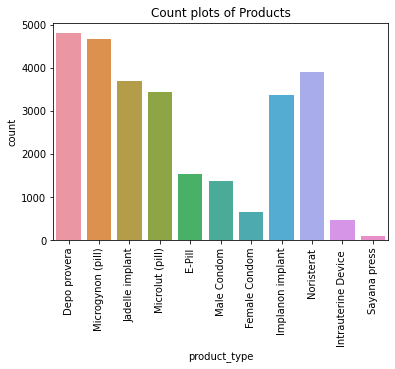

In [53]:
# Product Type
sns.countplot(df['product_type'])
plt.xticks(rotation = 90)
plt.title("Count plots of Products")

> Depo Provera had the highest count in our train dataset followed by the Microgynon pill. On the other hand, Sayana Press had the least count in our dataset. 

Text(0.5, 1.0, 'Count plots of Site Types')

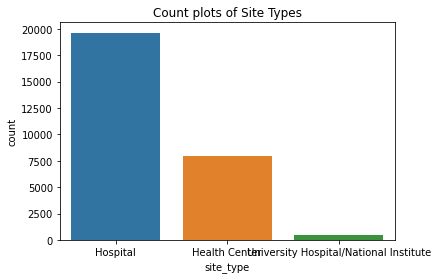

In [54]:
#SITE TYPE
sns.countplot(df['site_type'])
plt.title("Count plots of Site Types")

**INSIGHTS**

* The most common contraceptives used are **Depo Provera** followed by **Microgynon**.
* The least used contraceptive is **Sayana Press** probably because it is new in the market.
* The most common site type which is **Hospitals**.

### **BIVARIATE DATA ANALYSIS**

#### **HEAT MAPS**

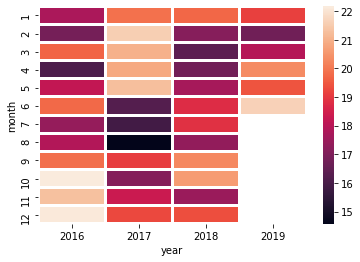

In [55]:
# Plotting a pivot Table to visualize the stock distributed across the years and months

pt= df.pivot_table(index='month',columns='year',values='stock_distributed2')
sns.heatmap(pt, linecolor='white',linewidths=2)

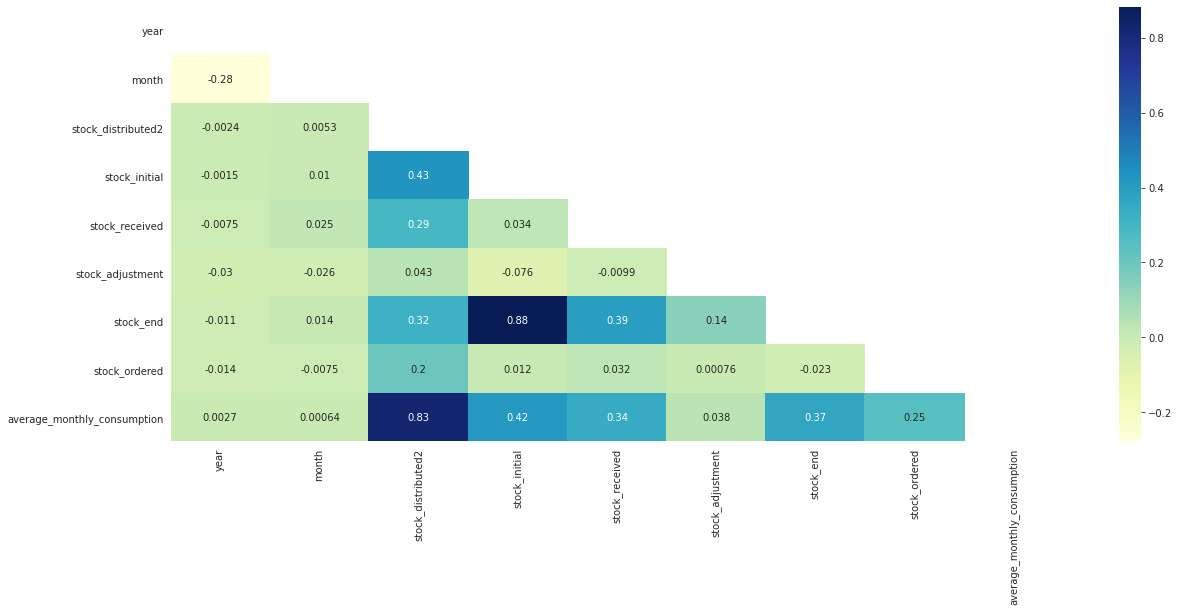

In [56]:
# Plotting a heat map to show correlation

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,8))
    ax = sns.heatmap(df.corr(),
mask=mask,annot=True,cmap="YlGnBu")

> From the correlation heatmap, we were able to determine that we had features with a high correlation i.e. stock_initial and stock_end. We will decide how to deal with them later. 

#### **SCATTER PLOTS**

Text(0, 0.5, 'Stock Distributed')

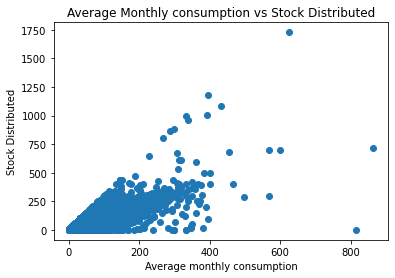

In [57]:
# Plotting scatter plots to show the relationship between variables

plt.scatter(df['average_monthly_consumption'], df['stock_distributed2'])
plt.title('Average Monthly consumption vs Stock Distributed')
plt.xlabel('Average monthly consumption')
plt.ylabel('Stock Distributed')

Text(0.5, 0, 'Stock Initial')

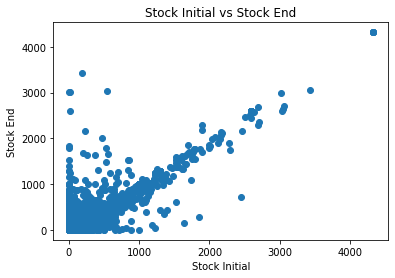

In [58]:
# Plotting the scatter relationship between stock end and stock initial 

plt.scatter(df['stock_initial'], df['stock_end'])
plt.title('Stock Initial vs Stock End')
plt.ylabel('Stock End')
plt.xlabel('Stock Initial')

> The two scatter plots indicate there is a high correlation between **average monthly consumption** and **stock distributed**. Also, the **stock initial** and **stock end** variables have a high correlation.

### **TIME SERIES ANALYSIS**

#### **LINE PLOTS**

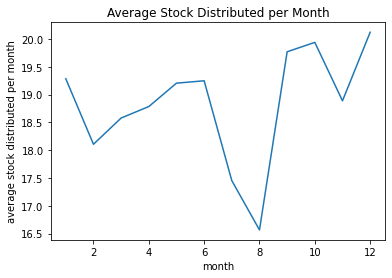

In [59]:
# Average stock distributed per month
g = df.groupby('month')['stock_distributed2'].mean().reset_index(name = 'average stock distributed per month')
sns.lineplot(x = 'month', data = g, y='average stock distributed per month')
plt.title('Average Stock Distributed per Month')
plt.show()

> From the line plot, we can tell there is a sharp decline in the average stock distributed column approaching the month of August and a steady rise afterwards. 

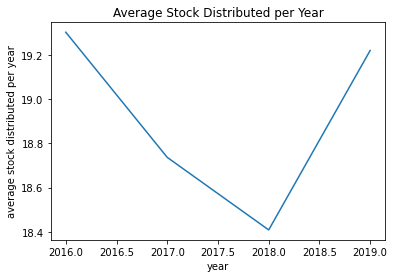

In [60]:
# Average stock distributed per year
j = df.groupby('year')['stock_distributed2'].mean().reset_index(name = 'average stock distributed per year')
sns.lineplot(x = 'year', data = j, y='average stock distributed per year')
plt.title('Average Stock Distributed per Year')
plt.show()

> From the line plot, we can tell that 2018 had the lowest average stock distributed. 

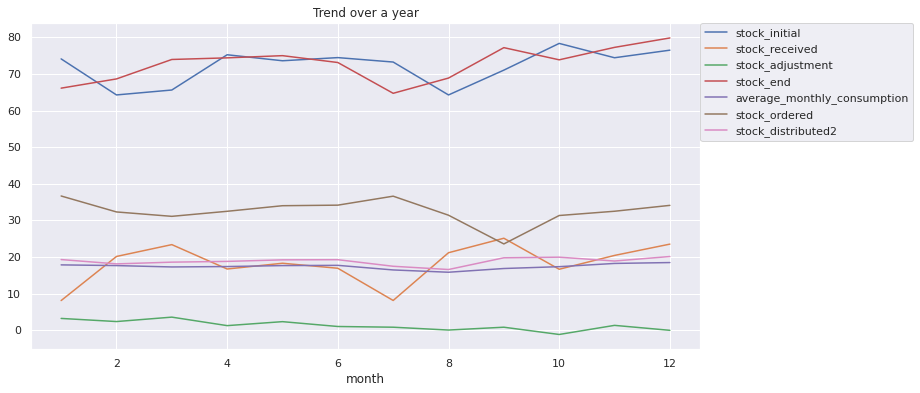

In [61]:
# Monthly Data
monthly_data = df.groupby('month').mean()[['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end','average_monthly_consumption', 'stock_ordered', 'stock_distributed2']]
sns.set(rc={'figure.figsize':(12,6)})
monthly_data.plot.line()
plt.title('Trend over a year')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


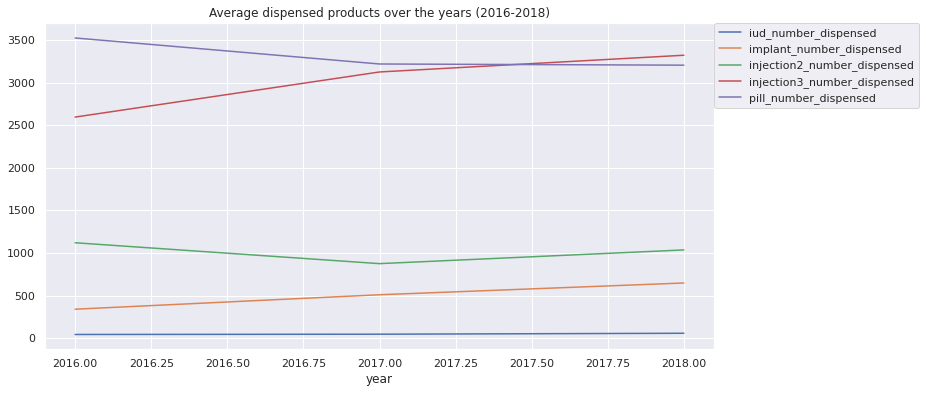

In [62]:
# Line plot for dispensed products over the years
dispensed = annual.groupby('year').mean()[['iud_number_dispensed','implant_number_dispensed','injection2_number_dispensed','injection3_number_dispensed','pill_number_dispensed']]
sns.set(rc={'figure.figsize':(12,6)})
dispensed.plot.line()
plt.title('Average dispensed products over the years (2016-2018)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


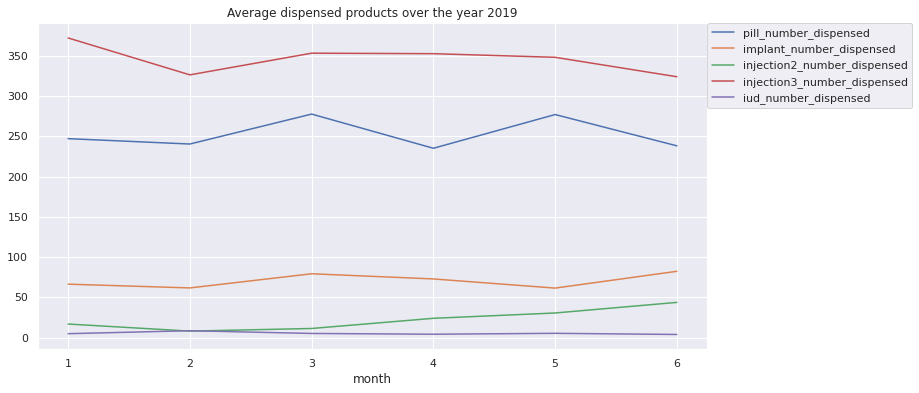

In [63]:
# Line plot for dispensed products over the year 2019
dispensed_2019 = monthly.groupby('month').mean()[['pill_number_dispensed','implant_number_dispensed','injection2_number_dispensed','injection3_number_dispensed','iud_number_dispensed']]
sns.set(rc={'figure.figsize':(12,6)})
dispensed_2019.plot.line()
plt.title('Average dispensed products over the year 2019')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

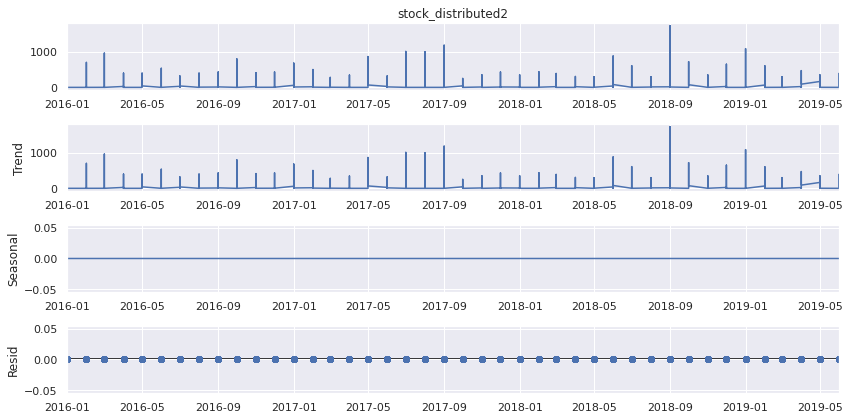

In [64]:
# Time series decomposition 

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose (df['stock_distributed2'],freq=1, model = 'additive')
fig = decomposition.plot()

> We performed time series decomposition for the stock_distributed2 column and noticed that there is no seasonality in our data and thus we can go ahead to test for stationarity. 

In [65]:
# Testing for stationarity
import statsmodels.tsa.stattools as sts

results = sts.adfuller(df['stock_distributed2'])

print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -26.152165668435906
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


> Adfuller test assumes a null hypothesis that our time series is not stationary and thus with the p-value being less than 0.05 (0.0), we can reject the null hypothesis and conclude that our time series is stationary and has no seasonal effects. 

##### **TEST FOR WHITE NOISE**
The **Ljung-Box** test improves upon the Box-Pierce test to obtain a test statistic having a distribution that is closer to the Chi-square distribution than the Q statistic.    
Let’s run the Ljung-Box test on the  data set. We will test upto **40 lags** and we’ll ask the test to also run the **Box-Pierce test**.   


In [66]:
# Testing for white noise using the Ljung-Box test 
import statsmodels.stats.diagnostic as diag
t = diag.acorr_ljungbox(df['stock_distributed2'], lags=[40], boxpierce=True)
print(f"\nLjung-Box test\nljung Statistic: {t[0]}")
print(f"p value: {t[1]}")
print(f"\nBoxpierce\nQ Statistic: {t[2]}")
print(f"p value: {t[3]}")



Ljung-Box test
ljung Statistic: [98.47149926]
p value: [7.74550173e-07]

Boxpierce
Q Statistic: [98.40389463]
p value: [7.911034e-07]


> With the p-value being less than 0.05, this indicates a significant auto-correlation that cannot be attributed to chance. Thus we can conclude that the time series is not pure white noise.

##### **TEST FOR RANDOM WALK**      
Random walk is a white noise which is auto-correlated.        
To test for random walk we take the first difference of the time series that is suspected to be a random walk, and run the white noise tests on the differenced series.

In [67]:
# First differencing the series 
diff_stock_dis = df['stock_distributed2'].diff()

# Drop the nan in the first row
diff_stock_dis = diff_stock_dis.dropna()

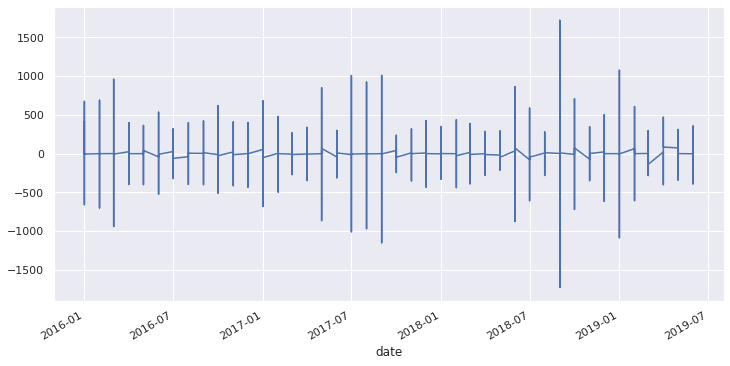

In [68]:
# plotting the differenced time series 

diff_stock_dis.plot()
plt.show()

In [69]:
# Running the Ljung-Box test on the differenced data set:
r = diag.acorr_ljungbox(diff_stock_dis, lags=[40], boxpierce=True)
print(f"\nLjung-Box test\nljung Statistic: {r[0]}")
print(f"p value: {r[1]}")
print(f"\nBoxpierce\nQ Statistic: {r[2]}")
print(f"p value: {r[3]}")


Ljung-Box test
ljung Statistic: [6938.83765001]
p value: [0.]

Boxpierce
Q Statistic: [6938.07053428]
p value: [0.]


> With the p-value being less than 0.05, we can conclude that the time series is neither white noise nor random walk.



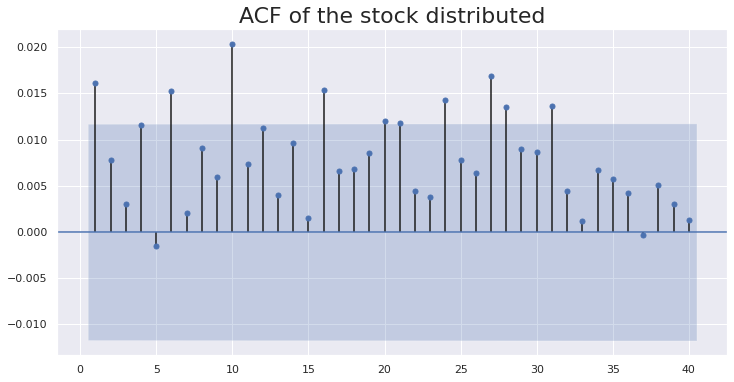

In [70]:
# Checking for autocorrelation
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df['stock_distributed2'], lags = 40, zero = False)
plt.title('ACF of the stock distributed', size =22)
plt.show()

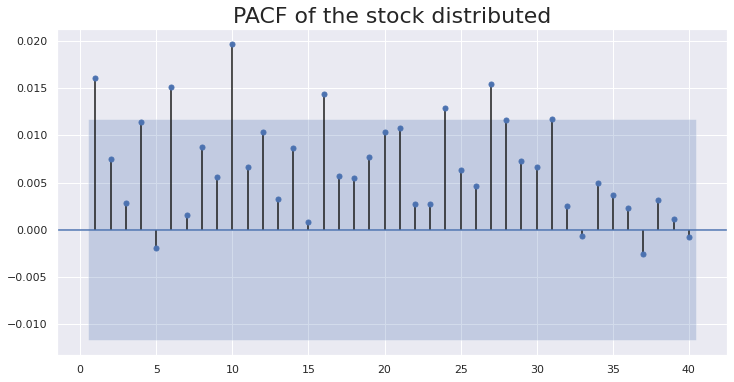

In [71]:
sgt.plot_pacf(df['stock_distributed2'], lags = 40, zero = False, method =('ols'))
plt.title('PACF of the stock distributed', size =22)
plt.show()

##**IMPLEMENTING THE SOLUTION**

### **PRE-PROCESSING**

####**ENCODING OUR COLUMNS**

In [72]:
# the independent variables set
X = df.drop('stock_distributed2', axis=1)
y = df["stock_distributed2"]

> We set the label/target variable as the stock_distributed2 column with the rest of the columns being the independent variables.

In [73]:
df.columns

Index(['product_type', 'site_code', 'site_type', 'year', 'month', 'region',
       'district', 'stock_distributed2', 'stock_initial', 'stock_received',
       'stock_adjustment', 'stock_end', 'stock_ordered',
       'average_monthly_consumption'],
      dtype='object')

In [74]:
# Label Encoding the relevant categorical columns
from sklearn.preprocessing import LabelEncoder

categ = ['product_type','site_code', 'site_type', 'region','district']

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()


,product_type,site_code,site_type,year,month,region,district,stock_distributed2,stock_initial,stock_received,stock_adjustment,stock_end,stock_ordered,average_monthly_consumption
date,,,,,,,,,,,,,,
2016-01-01,0,125,1,2016,1,15,28,0.0,0.0,0.0,0.0,0.0,25.0,0.0
2016-01-01,7,66,1,2016,1,8,35,417.0,1089.0,0.0,0.0,672.0,18.0,350.0
2016-01-01,5,88,1,2016,1,6,58,0.0,13.0,0.0,0.0,13.0,0.0,0.0
2016-01-01,0,42,1,2016,1,0,25,0.0,0.0,0.0,0.0,0.0,600.0,67.0
2016-01-01,7,139,1,2016,1,5,39,6.0,145.0,0.0,0.0,139.0,0.0,4.0


> We decided to label encode the product code, site code, site type, region and district columns for modelling purposes. 

#### **CHECKING FOR ASSUMPTIONS FOR REGRESSION**

##### **NORMALITY TESTS**

stock_distributed2


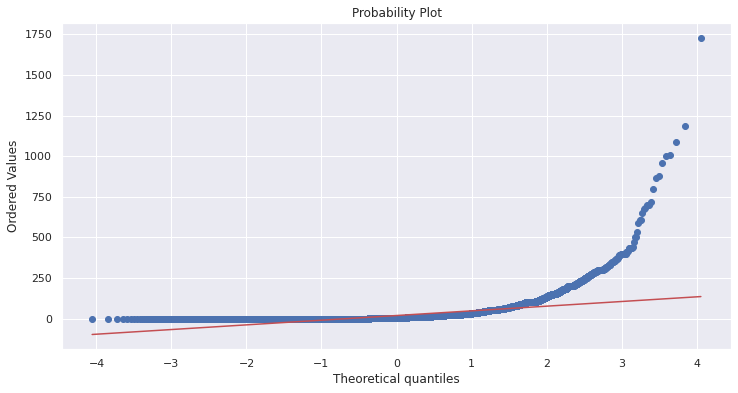



stock_initial


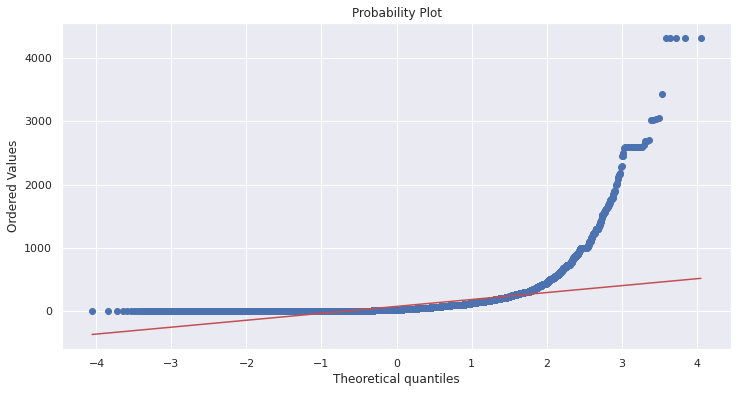



stock_received


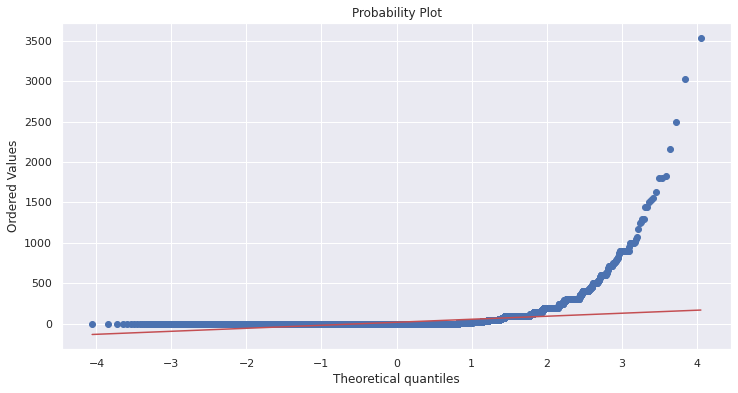



stock_adjustment


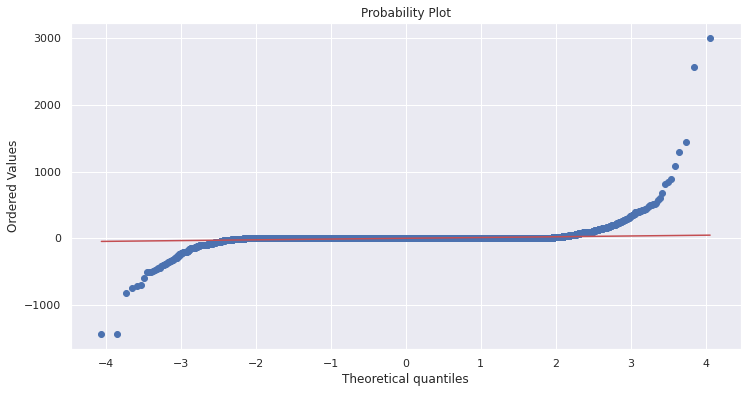



stock_end


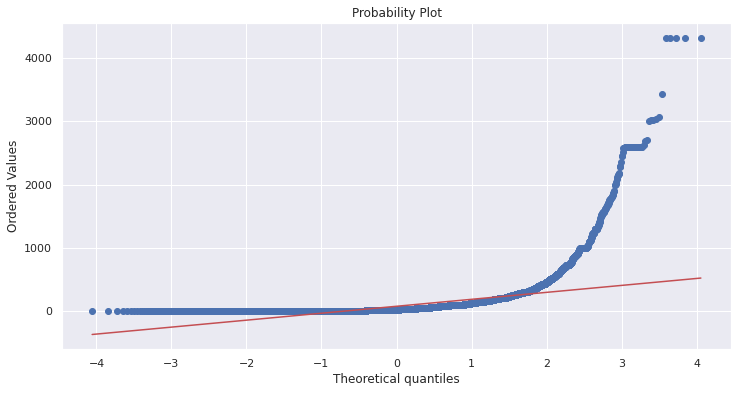



stock_ordered


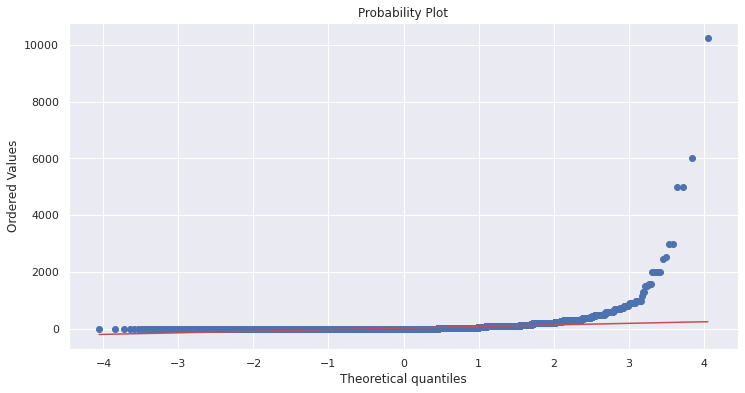



average_monthly_consumption


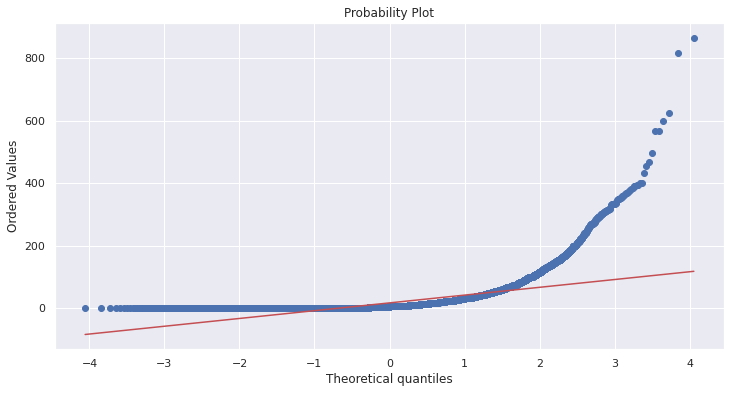

In [75]:
import scipy.stats
import pylab

normality = df[['stock_distributed2', 'stock_initial', 'stock_received',
       'stock_adjustment', 'stock_end', 'stock_ordered',
       'average_monthly_consumption']]

for column in normality:
  scipy.stats.probplot(normality[column],plot = pylab)
  print(column)
  pylab.show()
  print("\n")

##### **CHECK FOR MULTICOLLINEARITY**

In [76]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X = df.drop('stock_distributed2', axis=1)

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                        feature        VIF
0                  product_type   3.480759
1                     site_code   6.580947
2                     site_type   4.800871
3                          year  13.107356
4                         month   4.242991
5                        region   3.216587
6                      district   3.749775
7                 stock_initial  60.419498
8                stock_received  11.767960
9              stock_adjustment   3.739724
10                    stock_end  63.488494
11                stock_ordered   1.179026
12  average_monthly_consumption   4.307814


> * After checking for multicollinearity, we realized that there were some columns i.e stock_initial, stock_received and stock_end had high VIF scores which were greater than 10. Ideally we should drop them but upon understanding the business problem, we realized that these columns are still essential in helping us predict the consumption of the contraceptives. 
> * Thus we decided to experiment and drop the feature with the highest VIF score i.e stock_end and see the difference in the resulting VIF scores.

In [77]:
X.drop(columns = ["stock_end"], inplace = True)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                        feature        VIF
0                  product_type   3.479918
1                     site_code   6.580859
2                     site_type   4.800806
3                          year  13.106965
4                         month   4.242784
5                        region   3.216478
6                      district   3.749592
7                 stock_initial   1.475810
8                stock_received   1.225335
9              stock_adjustment   1.016251
10                stock_ordered   1.178969
11  average_monthly_consumption   1.906913


> After dropping the stock_end column, we realized a sharp decrease in the VIF scores for the other two columns i.e stock_initial and stock_received which means that we can proceed with modelling our dataset having dropped the stock_end column. 

####**SPLITTING THE DATA**

In [79]:
# Use the timeseries split
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [   0    1    2 ... 4669 4670 4671] TEST: [4672 4673 4674 ... 9337 9338 9339]
TRAIN: [   0    1    2 ... 9337 9338 9339] TEST: [ 9340  9341  9342 ... 14005 14006 14007]
TRAIN: [    0     1     2 ... 14005 14006 14007] TEST: [14008 14009 14010 ... 18673 18674 18675]
TRAIN: [    0     1     2 ... 18673 18674 18675] TEST: [18676 18677 18678 ... 23341 23342 23343]
TRAIN: [    0     1     2 ... 23341 23342 23343] TEST: [23344 23345 23346 ... 28009 28010 28011]


> Considering that the observations in a time series data are not independent, we used the **TimeSeriesSplit** function which separates the test data from the training data in a sequential manner i.e our train data ran from 2016 to early 2019 while the test data ran from 2019 January to 2019 June.

####**SCALING AND NORMALISING OUR DATA**

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> After splitting the data using the TimeSeriesSplit, we scaled our features so as to reduce the effect of outliers and also avoid situations where certain features carry more weight than others in the modelling bit. We used the **MinMax** scaler which basically scales all the features in the range [0,1] or [-1,1] if there are negative values in the dataset. 

### **MODELLING**

#### **BASELINE MODEL**

##### **MULTIPLE LINEAR REGRESSION MODEL**

In [100]:
from sklearn.linear_model import LinearRegression
from math import sqrt
regressor = LinearRegression()

# fitting our basemodel to the training set 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Getting the accuracy and metrics for our algo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("The MAE for the linear regression is:", mean_absolute_error(y_test, y_pred))
print("The MSE for the linear regression is:", mean_squared_error(y_test, y_pred))
print("The r2 for the linear regression is:", r2_score(y_test, y_pred))
print("The RMSE for the linear regression is:", sqrt(mean_squared_error(y_test, y_pred)))

The MAE for the linear regression is: 8.839917518008697
The MSE for the linear regression is: 493.3094545148633
The r2 for the linear regression is: 0.7062176630672611
The RMSE for the linear regression is: 22.210570783184824


> We decided to go with multiple linear regression as our baseline model and use it for comparison with the other regression models since our target variable is continuous. 
* Using this model we were able to attain a RMSE score of 22.21 and a r2 score of 0.706. 

###### **RESIDUAL PLOTS**


-0.4250978282295875


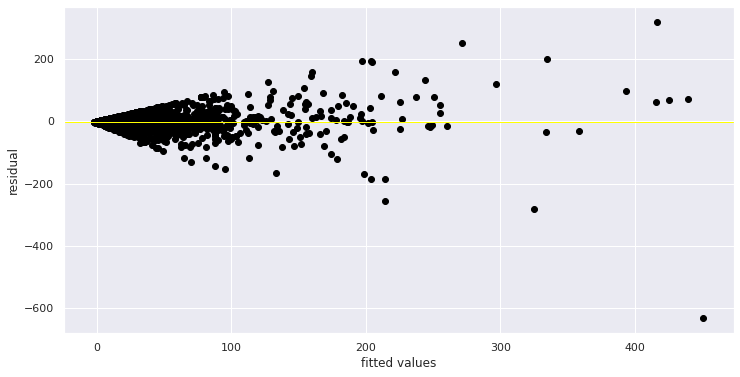

In [ ]:
# residual plots
residuals =np.subtract(y_pred, y_test)
print(residuals.mean())
#plotting the residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color= 'yellow', linewidth=1)
plt.show()

> Using the residual plot above we can confirm that using the linear regression model was indeed appropriate since the data points in our plot are randomly dispersed around the horizontal axis. 

###### **BARTLETT'S TEST**

In [ ]:
#Bartlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null hypothesis. This would mean that there are patterns to the variance of the data.
# Otherwise, we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


> We were able to determine that our variables have homogenous variances (homoscedasticity) using the Bartlett's test thus allowing us to use the various regression algorithms for modelling.  

#### **POLYNOMIAL REGRESSION**

In [ ]:
# Fitting the model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making a prediction
pred=  pol_reg.predict(poly_reg.fit_transform(X_test))

In [ ]:
# Evaluating the model
print("The MAE for the Polynomial regression is:", mean_absolute_error(y_test, pred))
print("The MSE for the Polynomial regression is:", mean_squared_error(y_test, pred))
print("The r2 for the Polynomial regression is:", r2_score(y_test, pred))
print("The RMSE for the Polynomial regression is:", sqrt(mean_squared_error(y_test, pred)))

The MAE for the Polynomial regression is: 9.787885181233722
The MSE for the Polynomial regression is: 593.8308319739651
The r2 for the Polynomial regression is: 0.6463538090272549
The RMSE for the Polynomial regression is: 24.368644442684232


> Using the polynomial regression model, with the degree set to 2, we attained a RMSE score of 24.368 which is worse than our baseline model. Having tested out different degrees, we were able to establish that the degree 2 gave us the best RMSE score for our data. 

#### **RIDGE REGRESSION MODEL**

In [101]:
# Importing the libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
# Determining the most appropriate value for the L2 Regularization

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(X, y)
search.best_params_

{'alpha': 0.001}

In [ ]:
abs(search.best_score_) 

603.6894878281478

> * Using GridSearchCV on our ridge regression model, we were able to determine the alpha hyperparameter that would give us the best score (603.689) was 0.001 which we went ahead to set before fitting our data. 
* Considering that ridge models never lead to a coefficient being zero rather minimizes it, one limitation of the model is that it can not be used for feature reduction.  

In [ ]:
# Fitting our model

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X, y)

#Evaluating our model

ridge_mse = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
ridge_rmse = sqrt((mean_squared_error(y_true=y,y_pred=ridge.predict(X))))
ridge_r2 = (r2_score(y_true=y,y_pred=ridge.predict(X)))

print(ridge_mse)
print(ridge_rmse)
print(ridge_r2)

598.6121609641469
24.466551881377704
0.6929791194355017


> We attained a RMSE score of 24.466 using the ridge regression model

#### **LASSO REGRESSION MODEL**

In [ ]:
#Importing the libraries we need
from sklearn.linear_model import Lasso

In [ ]:
#Fitting Lasso Regression

regr = Lasso(alpha=0.001)
model = regr.fit(X, y)

In [ ]:
#Evaluating the model

print("lasso score:", model.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, model.predict(X))) 
print("lasso RMSE:", sqrt(mean_squared_error(y, model.predict(X))))

lasso score: 0.6929799113769725
lasso MSE: 598.6106168809098
lasso RMSE: 24.46652032637477


> For uniformity and comparison purposes, we decided to set the alpha to 0.001 and utlimately attained a RMSE score similar to that of the ridge model i.e 24.466. 

#### **ELASTIC NET REGRESSION**

In [ ]:
# Elastic Net Model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Finding the best parameters

search.fit(X_train, y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [ ]:
abs(search.best_score_)

629.9495882581717

In [ ]:
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X, y)

mse=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
rmse = (sqrt(mean_squared_error(y_true=y,y_pred=elastic.predict(X))))
r2score = (r2_score(y_true=y,y_pred=elastic.predict(X)))
print("The MSE for Elastic Net Regression is:", mse)
print("The RMSE for Elastic Net Regression is:", rmse)
print("The r2 score for Elastic Net Regression is:", r2score)

The MSE for Elastic Net Regression is: 602.6345402822873
The RMSE for Elastic Net Regression is: 24.548615852676647
The r2 score for Elastic Net Regression is: 0.6909160901140947


> ElasticNet basically is the weighted average of Ridge and Lasso. Using this model with the alpha and l1 ratio hyperparameters set at 0.00001 and 0.8 respectively, we attained a RMSE score of 24.548 which is worse than the baseline model. 

#### **RANDOM FOREST REGRESSION MODEL**

In [ ]:
# Random Forest Regressor
# Import the model
from sklearn.ensemble import RandomForestRegressor
 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 8.25663486833093
Mean Squared Error: 613.3418530147682
Root Mean Squared Error: 24.765739500664385
R2 Score: 0.6347343411560218


> We attained a RMSE score of 24.76 using the RandomForest Regressor model. 

In [ ]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('product_type', 0.01), ('site_code', 0.01), ('site_type', 0.0), ('year', 0.0), ('month', 0.0), ('region', 0.0), ('district', 0.0), ('stock_initial', 0.08), ('stock_received', 0.01), ('stock_adjustment', 0.0), ('stock_ordered', 0.0), ('average_monthly_consumption', 0.88)]

Variable: average_monthly_consumption Importance: 0.88
Variable: stock_initial        Importance: 0.08
Variable: product_type         Importance: 0.01
Variable: site_code            Importance: 0.01
Variable: stock_received       Importance: 0.01
Variable: site_type            Importance: 0.0
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: region               Importance: 0.0
Variable: district             Importance: 0.0
Variable: stock_adjustment     Importance: 0.0
Variable: stock_ordered        Importance: 0.0


> Using the RandomForest model, we were able to establish that the most important features in our dataset that would help us in predicting the stock_distributed2 column are : 
* Average monthly consumption 
* Stock initial 
* Product Type
* Site code
* Stock received

##### **HYPERPARAMETER TUNING**

In [ ]:
# number of trees
n_estimators = [100, 200, 300, 400]
# max number of features
max_features = ['auto', 'sqrt', 'log2']
# max number of levels in tree
max_depth = [3, 5, 7, 10]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]

# Parameter grid
grid_param = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth, 
               'min_samples_split' : min_samples_split}

In [ ]:
# GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
RFR = RandomForestRegressor(random_state=1)
RFR_random = GridSearchCV(estimator = RFR,
                                param_grid = grid_param, 
                                cv = 5,
                                verbose = 2, 
                                n_jobs = -1)

RFR_random.fit(X, y)
print(RFR_random.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 63.3min finished


{'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 400}


> Using GridSearchCV, we were able to determine that the best parameters were : 
* Max_depth = 7
* Max_features = 'auto'
* Min_samples_split = 2
* N_estimators = 400

In [ ]:
# Using the best parameters chosen by the GridSearchCV
forest = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, max_depth=7, max_features = 'auto')
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 7.4164772766126985
Mean Squared Error: 526.5391586262896
Root Mean Squared Error: 22.946441088462706
R2 Score: 0.6864282589922088


> After using the best parameters chosen, we were able to improve on our initial model as we attained a lower RMSE score of 22.946 which is better than the baseline model. 

#### **GRADIENTBOOST REGRESSOR**

In [ ]:
# Importing the gradient boost model
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0, learning_rate=0.1)
reg.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = reg.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 8.120565547549429
Mean Squared Error: 714.9069870450794
Root Mean Squared Error: 26.737744614029797
R2 Score: 0.5742488950466311


> Having set the learning rate at 0.1, we attained a RMSE score of 26.73 which is worse than the baseline model. 

##### **HYPERPARAMETER TUNING**

In [ ]:
# number of trees
n_estimators = [100, 200, 300, 400]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# max number of levels in tree
max_depth = [3, 5, 7, 10]

# Parameter grid
grid_param = {'n_estimators' : n_estimators,
               'max_depth' : max_depth, 
               'min_samples_split' : min_samples_split}

In [ ]:
# Hyperparameter Tuning to get the best parameters
reg = GradientBoostingRegressor(random_state=0, learning_rate = 0.1)
search = GridSearchCV(estimator = reg,
                      param_grid = grid_param,
                      verbose = 2,
                      cv = 5,
                      n_jobs = -1)

search.fit(X, y)
print(search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 57.4min finished


{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


> After using GridSearchCV on our Gradient boosted regression model, we established that the best parameters in our model were : 
* Max_depth = 5
* Min_samples_split = 5
* N_estimators = 100

In [ ]:
# Using the best parameters chosen by the GridSearchCV
reg = GradientBoostingRegressor(random_state=0, n_estimators = 100, min_samples_split = 5, max_depth = 5)
reg.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = reg.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 7.6977014009805655
Mean Squared Error: 969.9836569356961
Root Mean Squared Error: 31.144560631604616
R2 Score: 0.4223421770795456


> Surprisingly enough, we attained a worse RMSE score of 31.14 as compared to the initial gradient boosted regression model. 

#### **CATBOOST REGRESSOR**

In [ ]:
# importing the catboost regressor
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=0, verbose=0)
cat.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = cat.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 7.402732351450278
Mean Squared Error: 340.09896363044317
Root Mean Squared Error: 18.441772247548315
R2 Score: 0.7974596525379511


> Using the Catboost Regressor, we attained a low RMSE score of 18.44 which was the lowest thus far. We can try optimizing this model to evaluate if our Catboost regressor can perform better. 

##### **HYPERPARAMETER TUNING**

In [ ]:
# number of trees
iterations = [100, 200, 300, 400]

# max number of levels in tree
depth = [6, 7, 8, 9, 10]

l2_leaf_reg = [0.01, 0.1, 1, 10]
# Parameter grid
grid_param = {'iterations' : iterations,
               'depth' : depth, 
               'l2_leaf_reg' : l2_leaf_reg}


In [ ]:
# Hyperparameter Tuning to get the best parameters
reg = CatBoostRegressor()
search = GridSearchCV(estimator = reg,
                      param_grid = grid_param,
                      verbose = 2,
                      cv = 5,
                      n_jobs = -1)

search.fit(X, y)
print(search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 22.6min finished


0:	learn: 43.2210162	total: 11.6ms	remaining: 4.64s
1:	learn: 42.3051183	total: 21ms	remaining: 4.17s
2:	learn: 41.4107125	total: 29.5ms	remaining: 3.9s
3:	learn: 40.5676269	total: 37.8ms	remaining: 3.74s
4:	learn: 39.7311566	total: 46ms	remaining: 3.63s
5:	learn: 38.9191316	total: 55.1ms	remaining: 3.62s
6:	learn: 38.1732543	total: 63.7ms	remaining: 3.58s
7:	learn: 37.4107398	total: 74ms	remaining: 3.63s
8:	learn: 36.7353035	total: 84.1ms	remaining: 3.65s
9:	learn: 36.0200819	total: 92.4ms	remaining: 3.6s
10:	learn: 35.3617333	total: 101ms	remaining: 3.57s
11:	learn: 34.7054749	total: 109ms	remaining: 3.52s
12:	learn: 34.0789982	total: 117ms	remaining: 3.49s
13:	learn: 33.4876169	total: 125ms	remaining: 3.46s
14:	learn: 32.9116033	total: 134ms	remaining: 3.43s
15:	learn: 32.3704662	total: 142ms	remaining: 3.41s
16:	learn: 31.8301946	total: 150ms	remaining: 3.39s
17:	learn: 31.2824205	total: 158ms	remaining: 3.36s
18:	learn: 30.7911780	total: 167ms	remaining: 3.35s
19:	learn: 30.301488

> Using GridSearchCV, we were able to determine that the best parameters in this case are :
* Depth = 8
* Iterations = 400
* l2 leaf reg = 0.01

In [ ]:
# importing the catboost regressor

cat = CatBoostRegressor(iterations = 400, depth = 8, l2_leaf_reg = 0.01, verbose=0)
cat.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = cat.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 7.016697281716211
Mean Squared Error: 335.91803375703597
Root Mean Squared Error: 18.328066830875425
R2 Score: 0.7999495366006222


> Using the best parameters, we were able to attain a RMSE score of 18.328 which is the best thus far. 

#### **ARIMA MODEL**

In [81]:
# importing the auto autp_arima
#Getting the optimal p,d,q, for arima
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['stock_distributed2'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=291700.596, Time=8.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=291702.214, Time=0.74 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=291696.981, Time=0.96 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=291697.155, Time=6.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=296387.172, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=291697.495, Time=3.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=291698.898, Time=8.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=291699.480, Time=8.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=295590.431, Time=0.37 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 37.651 seconds


> In order to obtain the optimal order i.e. p,d,q for our ARIMA model, we installed the pmdarima module then used the auto_arima function that gave us the best order i.e 

In [82]:
#Using the time series split to split our dataset
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

for train_index, test_index in tss.split(df):
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]


TimeSeriesSplit(max_train_size=None, n_splits=5)


> Having already defined our dependent and independent variables, we split our data using the TimeSeriesSplit so that we can separate the training from the test data in a sequential manner. 

In [83]:
#fitting our arima model 
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_train['stock_distributed2'],order=(1,0,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     stock_distributed2   No. Observations:                23344
Model:                     ARMA(1, 0)   Log Likelihood             -121859.669
Method:                       css-mle   S.D. of innovations             44.756
Date:                Mon, 09 Aug 2021   AIC                         243725.338
Time:                        15:52:42   BIC                         243749.512
Sample:                             0   HQIC                        243733.188
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       18.7387      0.298     62.812      0.000      18.154      19.323
ar.L1.stock_distributed2     0.0181      0.007      2.766      0.006       0.005       0.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           55.2449           +0.0000j           55.2449            0.0000
-----------------------------------------------------------------------------
"""

> We then fit our ARIMA model to our target variable using the order we obtained from the auto arima function. 

In [84]:
# predicting our from the arima model
start=len(df_train)
end=len(df_train)+len(df_test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

pred.index = df.index[start:end+1]
print(pred)

date
2019-01-01    18.852064
2019-01-01    18.740779
2019-01-01    18.738765
2019-01-01    18.738728
2019-01-01    18.738728
                ...    
2019-06-01    18.738728
2019-06-01    18.738728
2019-06-01    18.738728
2019-06-01    18.738728
2019-06-01    18.738728
Name: ARIMA Predictions, Length: 4668, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


> We set the start and end date using the dates in our train and test datasets respectively before predicting using our ARIMA model. 

(0.0, 250.0)

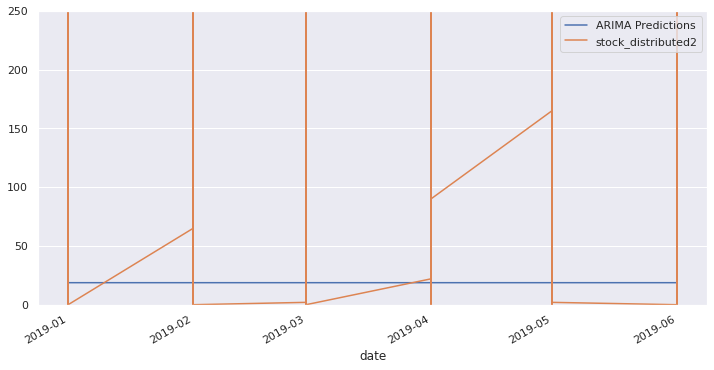

In [85]:
# Plotting the arima model against the actual values
pred.plot(legend=True)
df_test['stock_distributed2'].plot(legend=True)
plt.ylim(0,250)

> We proceeded to plot the ARIMA model against the actual values just to get a visual representation of how well our ARIMA model performed against the actual data. 

In [86]:
#Getting our mean of our column
from sklearn.metrics import mean_squared_error
from math import sqrt
df_test['stock_distributed2'].mean()

19.372536418166238

In [87]:
#Getting rmse of the model
rmse=sqrt(mean_squared_error(pred,df_test['stock_distributed2']))
print(rmse)

40.98253933034926


> We then determined the RMSE score of the ARIMA forecasting model and found it to be 40.98 which was quite high and worse as compared to the baseline RMSE. 

In [88]:
#Predicting the future
index_future_dates = pd.date_range(start = '2019-06-01', end = '2019-12-01', freq='MS')
#print(index_future_dates)
n_forecast = 7
predict = model.predict(start=len(df_train),end=len(df_train) + n_forecast-1).rename("Arima Forecast")
#print(comp_pred)
predict.index = index_future_dates
print(predict)

2019-06-01    18.852064
2019-07-01    18.740779
2019-08-01    18.738765
2019-09-01    18.738728
2019-10-01    18.738728
2019-11-01    18.738728
2019-12-01    18.738728
Freq: MS, Name: Arima Forecast, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


> * First we set the data range (start = 2019-06-01 to end = 2019-12-01) as our index so as to enable forecasting on future dates. 
* We set the n_forecast as 7 which basically means the next 7 months (June to December 2019) we are trying to forecast. 

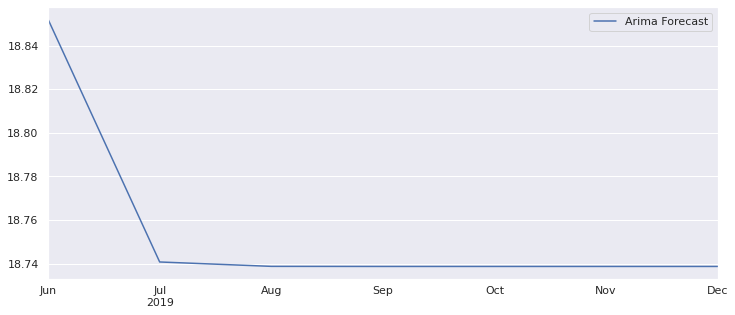

In [89]:
#Plotting forecast 
predict.plot(figsize=(12,5), legend = True)

> We then plot the forecast for visualization purposes. 

#### **PROPHET MODEL**

In [ ]:
# referring to the dataset with the date column
#dropping the null values 
df1.dropna(inplace=True)
df1.head()

In [112]:
# selecting the date column and our target column  
df2 = df1[['date','stock_distributed2']]
df2.head()

,date,stock_distributed2
0,2016-01-01,0.0
1,2017-01-01,0.0
2,2017-02-01,0.0
3,2017-03-01,0.0
4,2017-04-01,0.0


In [113]:
from pandas import to_datetime
df2.date = pd.to_datetime(df2.date)
df2.head()

,date,stock_distributed2
0,2016-01-01,0.0
1,2017-01-01,0.0
2,2017-02-01,0.0
3,2017-03-01,0.0
4,2017-04-01,0.0


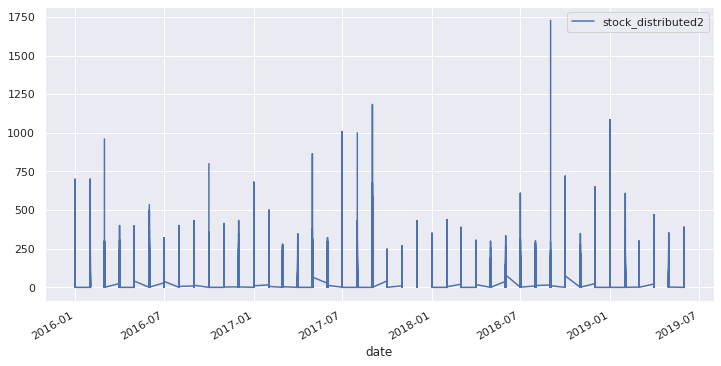

In [114]:
# plotting the dataframe
df2.plot(x='date')
plt.show()

In [115]:
# Confirming our data types
df2.dtypes

date                  datetime64[ns]
stock_distributed2           float64
dtype: object

> we see that the date column is already in datetime format 

In [116]:
# fit prophet model on our dataset
from fbprophet import Prophet

df2.columns = ['ds', 'y']
# define the model
model = Prophet()
# fit the model
model.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


> we then fitted the model on the dataset (Date and stock_distributed columns).

In [117]:
# inorder to make a prediction and forecast we defined the period for which we want
future = list()
for i in range(1, 13):
	date = '2019-%12d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

           ds       yhat  yhat_lower  yhat_upper
0  2019-01-01  17.204806  -32.347160   71.550956
1  2019-02-01  15.212679  -37.042126   72.497121
2  2019-03-01  15.184007  -39.775643   64.170342
3  2019-04-01  16.793252  -34.341128   70.829165
4  2019-05-01  16.418606  -34.073378   72.330607
5  2019-06-01  18.014866  -35.347018   69.854022
6  2019-07-01  17.387219  -36.694528   70.490733
7  2019-08-01  15.219624  -41.305780   68.278782
8  2019-09-01  19.248324  -34.623285   72.595682
9  2019-10-01  19.486520  -33.501611   73.059042
10 2019-11-01  18.397040  -39.887426   66.309248
11 2019-12-01  20.530167  -34.712036   71.189334


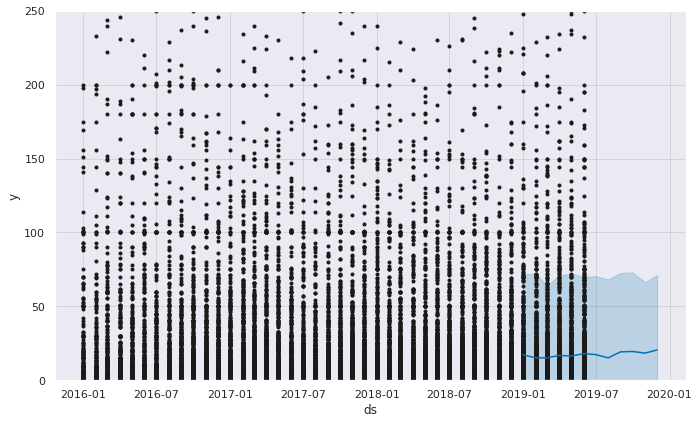

In [118]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# plot forecast
model.plot(forecast)
plt.ylim(0,250)
plt.show()

> we visualized the out-of-sample forecast along with their respective confidence intervals. The plot is created to help us evaluate the prediction in the context of the training data.

In [119]:
#Evaluating the model
# we compare values for the true values and the forecasted 
y_true = df2['y'][-12:].values
y_pred = forecast['yhat'].values

# calculating  MAE and RMSE  
mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(mean_squared_error(y_true, y_pred))
print('MAE: %.3f'% mae)
print("RMSE: %.3f" % rmse)

MAE: 15.925
RMSE: 16.174


> Here we evaluated the model on the expected and predicted values